# Presentation d'un problème d'ordonnancement

In [1]:
from ordonnancement.probleme import Probleme, Tache
from ordonnancement.edt import EDT
from ordonnancement.algorithme import resous, max_fin, nom_fin, resous_2, range_bis, range_prob, marges, range_prob_desor, resous_3, resous_4

In [2]:
probleme = Probleme(
            taches=[
                 Tache(nom="A", duree=3, prerequis=[]),
                 Tache(nom="B", duree=4, prerequis=["A","I"]),
                 Tache(nom="C", duree=1, prerequis=["B"]),
                 Tache(nom="D", duree=4, prerequis=[]),
                 Tache(nom="E", duree=2, prerequis=["D","H"]),
                 Tache(nom="F", duree=5, prerequis=["E","I"]),
                 Tache(nom="G", duree=1, prerequis=[]),
                 Tache(nom="H", duree=3, prerequis=["G"]),
                 Tache(nom="I", duree=5, prerequis=["H"]),
                 Tache(nom="J", duree=6, prerequis=[]),
                 Tache(nom="K", duree=3 , prerequis=["J","I"]),
                 Tache(nom="L", duree=14, prerequis=[]),
                 Tache(nom="M", duree=2, prerequis=["I"]),
                 Tache(nom="N", duree=2, prerequis=["M","L"]),
                 Tache(nom="O", duree=3, prerequis=["M","F","C"]),
                 Tache(nom="P", duree=3, prerequis=["O","N"]),
                 Tache(nom="Q", duree=2, prerequis=["P"]),
                 Tache(nom="R", duree=1, prerequis=["N","K","O"]),
                 Tache(nom="S", duree=3, prerequis=["R"])
             ]
         )

On commence juste par résoudre en prenant en compte que l'on peut faire plusieurs actions en même temps, intuitivement on pense directement par faire la tâches L, car celle-ci comprends **14 semaines**.

Les autres tâches peuvent se faire pour l'instant de **manière simultannée**, donc l'optimisation logique serait donc de faire les tâches et leurs prérequis avant d'arriver au termes des 14 semaines de L.

Comme L prend beaucoup de temps on se doute que les tâches ayant pour prérequis L seront dans les dernière à être effectuée.

Le problème d'ordonnancement est le suivant :

In [3]:
probleme.affiche()

On crée manuellement un graph pour voir à quoi cela ressemble.

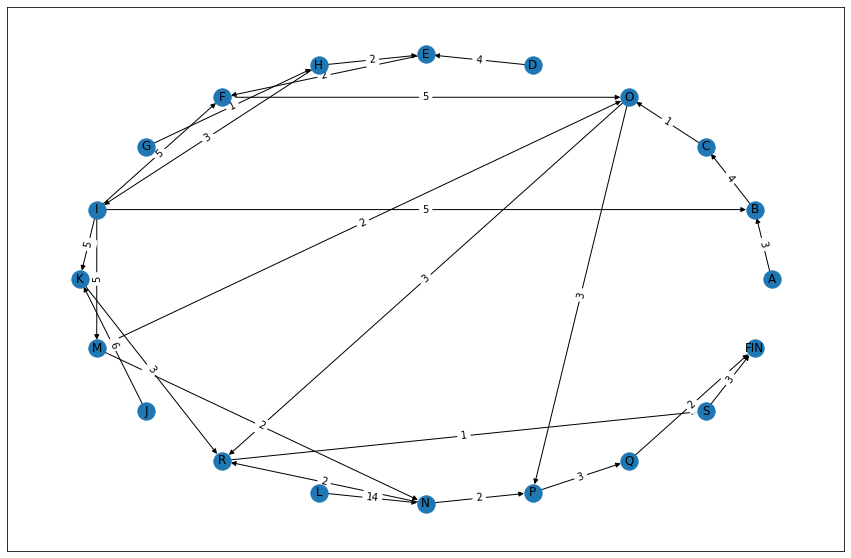

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (15, 10)

a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s = "ABCDEFGHIJKLMNOPQRS"
fin="FIN"
cahier = nx.DiGraph()
cahier.add_weighted_edges_from(
    [
        (a,b,3),
        (b,c,4),
        (c,o,1),
        (d,e,4),
        (h,e,2),
        (e,f,2),
        (f,o,5),
        (g,h,1),
        (h,i,3),
        (i,b,5),
        (i,f,5),
        (i,k,5),
        (i,m,5),
        (j,k,6),
        (k,r,3),
        (l,n,14),
        (m,n,2),
        (m,o,2),
        (n,p,2),
        (n,r,2),
        (o,p,3),
        (o,r,3),
        (p,q,3),
        (r,s,1),
        (q,fin,2),
        (s,fin,3)
 ],
    weight="duree"
)
positions = nx.circular_layout(G=cahier)
nx.draw_networkx(G=cahier,pos=positions)
etiquettes = nx.get_edge_attributes(G=cahier, name="duree")
textes = nx.draw_networkx_edge_labels(G=cahier, pos=positions, edge_labels=etiquettes)

On voit donc que la tâche S et Q sont les dernière tâches à effectuer.
Après avoir vérifié qu'il avait bien un résolution, on procède à la résolution via l'edt qu'on retrouve dans l'algorithme, comme notre problème est déjà défini on peut utiliser la fonction resous de algorithme.py, celle-ci prend donc un probleme comme on a défini plus haut pour résortir automatiquement un emploi du temps contenant la résolution.

Avant ca on regarde si le probleme est valide

In [5]:
probleme._est_valide()

'le probleme est ok'

In [6]:
res=resous(probleme)

Voici donc la solution du problème d'ordonnancement

In [7]:
res.genere_table()

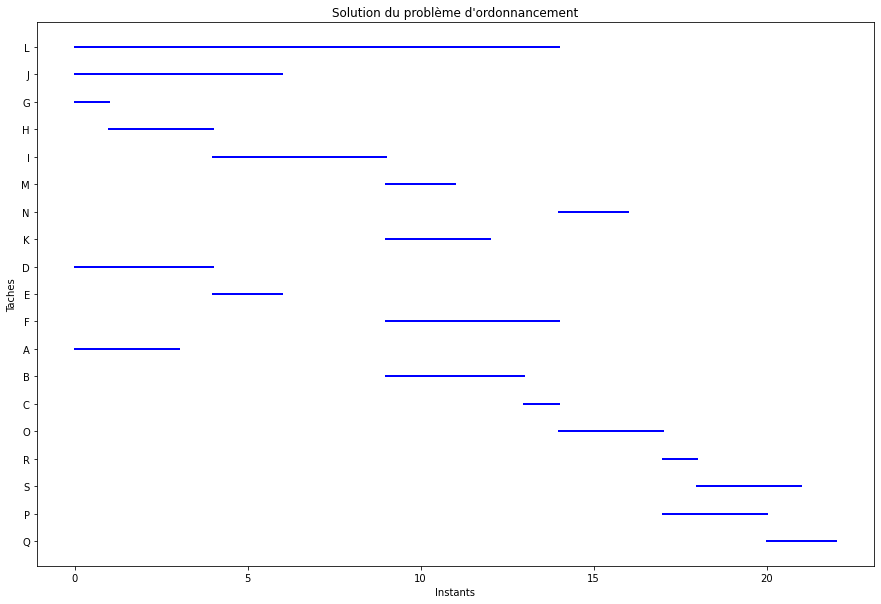

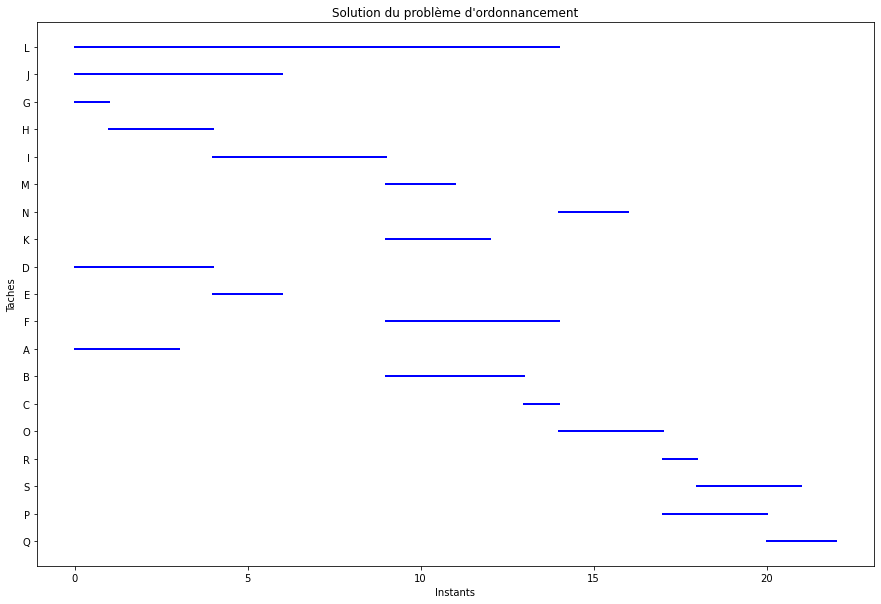

In [8]:
res.genere_graphique()

J'utilise le fonction range_prob pour ranger le probleme pour ordre croissant de début :

In [9]:
range_prob(probleme)

[Tache(nom='L', duree=14, prerequis=[]),
 Tache(nom='J', duree=6, prerequis=[]),
 Tache(nom='G', duree=1, prerequis=[]),
 Tache(nom='D', duree=4, prerequis=[]),
 Tache(nom='A', duree=3, prerequis=[]),
 Tache(nom='H', duree=3, prerequis=['G']),
 Tache(nom='I', duree=5, prerequis=['H']),
 Tache(nom='E', duree=2, prerequis=['D', 'H']),
 Tache(nom='M', duree=2, prerequis=['I']),
 Tache(nom='K', duree=3, prerequis=['J', 'I']),
 Tache(nom='F', duree=5, prerequis=['E', 'I']),
 Tache(nom='B', duree=4, prerequis=['A', 'I']),
 Tache(nom='C', duree=1, prerequis=['B']),
 Tache(nom='N', duree=2, prerequis=['M', 'L']),
 Tache(nom='O', duree=3, prerequis=['M', 'F', 'C']),
 Tache(nom='R', duree=1, prerequis=['N', 'K', 'O']),
 Tache(nom='P', duree=3, prerequis=['O', 'N']),
 Tache(nom='S', duree=3, prerequis=['R']),
 Tache(nom='Q', duree=2, prerequis=['P'])]

In [10]:
solution = range_bis(probleme)

In [11]:
solution.genere_table()

Dans ce projet les Tâches A, L, G, D et J sont lançable en même temps et correspondent au début du projet, la fin du projet est caractérisé par la fin de Q.

Au total il faudra 22 semaines pour finir de construire la maison, le début correspond à la date au plus tôt à laquelle la tâche pourra commencer, exemple la tâche I pourra commencer quand la tâche H sera effectué (3 semaines) qui nécéssite elle aussi que G soit effectué (1 semaine) donc la date au plus tôt est de 4 semaines avant de pouvoir commencer I.

Introduisons maintenant le concept des dates au plus tard :

- Une date au plus tard correspond à la valeure maximum que peut prendre le début d'execution d'une tâche pour ne pas pénaliser l'ensemble du projet.

- On peut partir du principe que des imprévu peuvent arriver, l'intérêt est donc voir sur quelles tâches nous avons de la "marge".

Exemple de date au plus tard sur les niveaux les plus élevés: 

- Pour Q on sait que le projet se fini à 22 semaines, comme Q dure 2 semaines il a tout intérêt à commencer à la semaine 20 donc Q ne doit jamais prendre du retard.

- Pour S sa date au plus tard est 19 car elle dure 3 semaines, étant donné qu'en résolvant de manière optimisé on trouve 18 nous avons donc une marge d'une semaine sur S.

In [12]:
nom_fin(probleme)

['Q', 'S']

La fonction nom_fin me sert à savoir quelles sont les dernières tâches, nécéssaire pour construire les premières dates au plus tard.

In [13]:
max_fin(probleme)

22

Ici avec la fonction max_fin je regarde la fin de la dernière tâche (Q ici en l'ocurrence), c'est donc a partir de cette valeur qu'on peut calculer les dates au plus tard des deux dernières tâches


Je met le probleme de manière décroissant au début pour effectuer les dates au plus tard qui nécéssite de commencer par la fin.

In [14]:
range_prob_desor(probleme)

[Tache(nom='Q', duree=2, prerequis=['P']),
 Tache(nom='S', duree=3, prerequis=['R']),
 Tache(nom='R', duree=1, prerequis=['N', 'K', 'O']),
 Tache(nom='P', duree=3, prerequis=['O', 'N']),
 Tache(nom='N', duree=2, prerequis=['M', 'L']),
 Tache(nom='O', duree=3, prerequis=['M', 'F', 'C']),
 Tache(nom='C', duree=1, prerequis=['B']),
 Tache(nom='M', duree=2, prerequis=['I']),
 Tache(nom='K', duree=3, prerequis=['J', 'I']),
 Tache(nom='F', duree=5, prerequis=['E', 'I']),
 Tache(nom='B', duree=4, prerequis=['A', 'I']),
 Tache(nom='I', duree=5, prerequis=['H']),
 Tache(nom='E', duree=2, prerequis=['D', 'H']),
 Tache(nom='H', duree=3, prerequis=['G']),
 Tache(nom='L', duree=14, prerequis=[]),
 Tache(nom='J', duree=6, prerequis=[]),
 Tache(nom='G', duree=1, prerequis=[]),
 Tache(nom='D', duree=4, prerequis=[]),
 Tache(nom='A', duree=3, prerequis=[])]

j'affecte la tache fin qui sera la tache finale et ayant comme prérequis les lettre issues de nom_fin

In [15]:
desordre = Probleme(
            taches=[Tache(nom='FIN',duree=0,prerequis=nom_fin(probleme)),
                 Tache(nom='Q', duree=2, prerequis=['P']),
 Tache(nom='S', duree=3, prerequis=['R']),
 Tache(nom='R', duree=1, prerequis=['N', 'K', 'O']),
 Tache(nom='P', duree=3, prerequis=['O', 'N']),
 Tache(nom='N', duree=2, prerequis=['M', 'L']),
 Tache(nom='O', duree=3, prerequis=['M', 'F', 'C']),
 Tache(nom='C', duree=1, prerequis=['B']),
 Tache(nom='M', duree=2, prerequis=['I']),
 Tache(nom='K', duree=3, prerequis=['J', 'I']),
 Tache(nom='F', duree=5, prerequis=['E', 'I']),
 Tache(nom='B', duree=4, prerequis=['A', 'I']),
 Tache(nom='I', duree=5, prerequis=['H']),
 Tache(nom='E', duree=2, prerequis=['D', 'H']),
 Tache(nom='H', duree=3, prerequis=['G']),
 Tache(nom='L', duree=14, prerequis=[]),
 Tache(nom='J', duree=6, prerequis=[]),
 Tache(nom='G', duree=1, prerequis=[]),
 Tache(nom='D', duree=4, prerequis=[]),
 Tache(nom='A', duree=3, prerequis=[])
             ]
         )

resous_2(probleme) sert à renvoyer les debut et fin que l'on collera dans resous_3 car je n'ai pas réussi a implanter la fonction resous2 dans resous3, même procédé avec les dates au plus tard.

In [16]:
resous_2(probleme)

([0, 0, 0, 0, 0, 1, 4, 4, 9, 9, 9, 9, 13, 14, 14, 17, 17, 18, 20],
 [14, 6, 1, 4, 3, 4, 9, 6, 11, 12, 14, 13, 14, 16, 17, 18, 20, 21, 22])

Nous avons donc notre tableau contenant les dates au plus tard de chaque tâches.

In [17]:
resultat=resous_3(probleme)
resultat.genere_table_bis()

In [18]:
resultat.date_valide()

True

On trouve que le chemin critique est le suivant : 

In [19]:
resultat.chemin_critique()

[Activite(tache=Tache(nom='G', duree=1, prerequis=[]), debut=0, fin=1, dta=0, mar=0),
 Activite(tache=Tache(nom='H', duree=3, prerequis=['G']), debut=1, fin=4, dta=1, mar=0),
 Activite(tache=Tache(nom='I', duree=5, prerequis=['H']), debut=4, fin=9, dta=4, mar=0),
 Activite(tache=Tache(nom='F', duree=5, prerequis=['E', 'I']), debut=9, fin=14, dta=9, mar=0),
 Activite(tache=Tache(nom='B', duree=4, prerequis=['A', 'I']), debut=9, fin=13, dta=9, mar=0),
 Activite(tache=Tache(nom='C', duree=1, prerequis=['B']), debut=13, fin=14, dta=13, mar=0),
 Activite(tache=Tache(nom='O', duree=3, prerequis=['M', 'F', 'C']), debut=14, fin=17, dta=14, mar=0),
 Activite(tache=Tache(nom='P', duree=3, prerequis=['O', 'N']), debut=17, fin=20, dta=17, mar=0),
 Activite(tache=Tache(nom='Q', duree=2, prerequis=['P']), debut=20, fin=22, dta=20, mar=0)]

Nous pouvons donc comparer entre la date au plus tard et le début optimal, chaque tâche qui a un début et une date au plus tard identique est considérée comme une **tâche critique**, c'est à dire que la tâche ne doit surtout pas avoir de retard pour son execution.

Cela nous sert à savoir sur quelles tâche nous avons de la **marge** et donc un potentiel lapse de temps sur le quel une tâche peut avoir un imprévu.

Les tâche critique sont : G $\rightarrow$ H $\rightarrow$ I $\rightarrow$ F $\rightarrow$ B $\rightarrow$ C $\rightarrow$ O $\rightarrow$ P $\rightarrow$ Q

Je prend donc note des marges de chaque tache que je colle dans resous_4.

In [20]:
marges(resultat)

[1, 9, 0, 3, 6, 0, 0, 3, 3, 6, 0, 0, 0, 1, 0, 1, 0, 1, 0]

In [21]:
final=resous_4(probleme)
final.genere_table_mar()

La tâche ou la marge est la plus importe est de 9 semaines.

In [22]:
final.marge_max()

9

In [23]:
final.nom_marge_max()

Activite(tache=Tache(nom='J', duree=6, prerequis=[]), debut=0, fin=6, dta=9, mar=9)

Nous savons donc maintenant que la tache J est la tache ou nous pouvons nous permettre d'avoir 9 semaines de retard au maximum sans contrebalançer le bon déroulement du projet de 22 semaines.